# IBM Data Science Capstone Project
## Opening a Gas Station in a Growing City to Get the Most Traffic

Just 25 minutes north of Dallas is a growing suburb called Frisco. It is one of the fastest growing cities in the country and is predicted to grow even larger in the coming years. It is now home to the Dallas Cowboys training facility and the national headquarters of both Frito-Lay and Toyota with more moving in the future. This seems like a perfect time to move business there while the land is still relatively cheap.

I would like to open up a gas station in Frisco in an area that is lacking this commodity. I will be using geolocation data from the FourSquare api and using that data to find location clusters of all the gas stations in the area. I will be taking the latitude and longitude of each gas station in the area. I am not sure what ML algorithm that I will be using yet but I will be trying out KMeans, Decision Tree, and Density Based clustering. Then I will pick up to three of the best future locations for these properties, and hey maybe I will take out a bigger loan and open two of them.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

In [28]:
url1 = 'https://en.wikipedia.org/wiki/Frisco,_Texas'
df_pop = pd.read_html(url1)

In [29]:
df_pop = df_pop[3]
df_pop.head(12)

Historical population                                   
                  Census    Pop. Unnamed: 2_level_1      %±
0                   1910     332                NaN       —
1                   1920     733                NaN  120.8%
2                   1930     618                NaN  −15.7%
3                   1940     670                NaN    8.4%
4                   1950     736                NaN    9.9%
5                   1960    1184                NaN   60.9%
6                   1970    1845                NaN   55.8%
7                   1980    3420                NaN   85.4%
8                   1990    6138                NaN   79.5%
9                   2000   33714                NaN  449.3%
10                  2010  116989                NaN  247.0%
11             Est. 2018  188170                [1]   60.8%

As you can see in the chart above, the population of Frisco has grown greatly especially over the last 20 years.

In [30]:
import sys
!{sys.executable} -m pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 14.3MB/s ta 0:00:01


In [31]:
import json

In [33]:
CLIENT_ID = 'UDSYP4ABRNGJBSIKUJYGV2ZSCD4PHDMIJU41LQDIT0BKVGB4' # your Foursquare ID
CLIENT_SECRET = 'GQLIL0EKJRMLT3FL1ARE1DJGQGQ0N2IFWOHZRISI1TCMMMQR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [35]:
lat_lng_coords = None
while lat_lng_coords == None:
        g = geocoder.arcgis('Frisco, Texas')
        lat_lng_coords = g.latlng

In [40]:
print(lat_lng_coords)
lat = lat_lng_coords[0]
lng = lat_lng_coords[1]
LOCATION = 'Frisco, TX'

[33.15048000000007, -96.83465999999999]


In [85]:
import requests
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&query=gas%station&near={}&limit=65'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            LOCATION)

In [86]:
# make the GET request
results = requests.get(url).json()

In [87]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

In [88]:
nearby_venues.head()
mygas = nearby_venues[['venue.name', 'venue.location.address', 'venue.location.city','venue.location.lat', 'venue.location.lng']]

In [89]:
mygas.head()

,venue.name,venue.location.address,venue.location.city,venue.location.lat,venue.location.lng
0,Costco Gasoline,5700 Eldorado,Frisco,33.174706,-96.836059
1,RaceTrac,"3425 Legacy Drive,",Frisco,33.107297,-96.842362
2,Kroger Fuel Center,3205 Main St,Frisco,33.152650,-96.863440
3,QuikTrip,5530 Eldorado Pkwy,Frisco,33.175527,-96.838572
4,Valero Corner Store,NaN,Frisco,33.106491,-96.816592


### Now we have a full data frame of all of the gas stations in Frisco with their locations attatched

Now we are going to figure out the location with the least gas stations around it

In [115]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

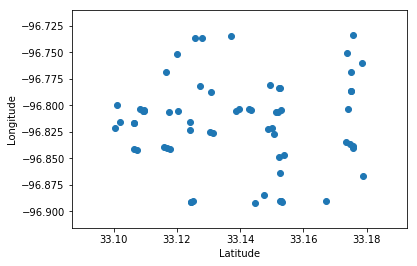

In [97]:
plt.scatter(x = 'venue.location.lat', y = 'venue.location.lng', data = mygas)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Graphical representation of the shape of all the gas stations

In [138]:
X = mygas[['venue.location.lat', 'venue.location.lng']]
X = np.array(X)

In [139]:
group = DBSCAN(eps = .01).fit(X)

In [140]:
group.labels_

array([-1,  3, -1, -1, -1, -1,  3, -1,  1, -1, -1, -1, -1,  0,  1,  0, -1,
        1, -1, -1,  2,  1, -1,  2, -1,  2,  2,  2,  0,  0,  1, -1, -1, -1,
        0,  3,  3, -1, -1, -1,  2, -1, -1, -1, -1,  3, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1,  2, -1, -1, -1,  0])

In [128]:
!{sys.executable} -m pip install folium
import folium

     |████████████████████████████████| 92kB 7.7MB/s eta 0:00:011


In [142]:
venue = np.array(mygas['venue.name'])

In [151]:
map = folium.Map(location=[33.1507, -96.8236], zoom_start=13)
for point in range(len(mygas['venue.name'])):
    folium.Marker(X[point], popup = venue[point]).add_to(map)

In [152]:
map

We are able to see all of the gas stations on the map